<a href="https://colab.research.google.com/github/VADDICHANDAN/CHANDAN-VADDI/blob/master/base_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
train=pd.read_csv('/content/drive/MyDrive/Project 4/train.csv',low_memory=False)
ytr=train['Credit_Score']
ytr
xtr=train.iloc[:,:-1]
xtr['TYPE']='TRAIN'
test=pd.read_csv('/content/drive/MyDrive/Project 4/test.csv')
test['TYPE']='TEST'
df=pd.concat([xtr,test],axis=0)
df=df.reset_index(drop=True)
df 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,TYPE
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,TRAIN
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,TRAIN
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,TRAIN
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,TRAIN
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,TEST
149996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,TEST
149997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,TEST
149998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,TEST


In [10]:
y=pd.DataFrame(ytr.map({'Good': 2, 'Standard': 1, 'Poor': 0}))
y=y.astype(object)

In [11]:
#handled
df['SSN']=df.groupby('Customer_ID')['SSN'].transform(lambda x:x.replace('#F%$D@*&8',np.NaN))
df['SSN']=df.groupby('Customer_ID')['SSN'].transform(lambda x:x.fillna(x.mode()[0]))

In [12]:
#occupation
df['Occupation']=df.groupby('SSN')['Occupation'].transform(lambda x:x.replace('_______',np.NaN))
df['Occupation']=df.groupby('SSN')['Occupation'].transform(lambda x:x.fillna(x.mode()[0]))

In [13]:
#payment_Behaviour
df['Payment_Behaviour']=df.groupby('SSN')['Payment_Behaviour'].transform(lambda x:x.replace('!@9#%8',np.NaN))
df['Payment_Behaviour']=df.groupby('SSN')['Payment_Behaviour'].transform(lambda x:x.fillna(x.mode()[0]))

In [14]:
df['AGELIST']=df['Age'].str.split('_')
df['Age']=df['AGELIST'].apply(lambda x:x[0])
df['Age']=df['Age'].astype('float64')
df['RRR']=df.groupby(['TYPE','Customer_ID'])['Age'].transform(lambda x:x.mode()[0])
df['Age']=df.groupby(['Customer_ID'])['RRR'].transform(lambda x:x.max())
df.drop(['RRR','AGELIST'],axis=1,inplace=True)

In [15]:
df['Annual_Income']=df.groupby('SSN')['Annual_Income'].transform(lambda x:x.mode()[0])

In [16]:
df['Monthly_Inhand_Salary']=df.groupby('SSN')['Monthly_Inhand_Salary'].transform(lambda x:x.mode()[0])

In [17]:
df['Num_Bank_Accounts']=df.groupby('SSN')['Num_Bank_Accounts'].transform(lambda x:x.mode()[0])

In [18]:
df['Interest_Rate']=df.groupby('SSN')['Interest_Rate'].transform(lambda x:x.mode()[0])

In [19]:
df.iloc[:,10:]

,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,TYPE
0,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,TRAIN
1,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,TRAIN
2,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,TRAIN
3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,TRAIN
4,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343,TEST
149996,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066,TEST
149997,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098,TEST
149998,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717,TEST


In [20]:
df['Num_of_Loan']=df.groupby('SSN')['Num_of_Loan'].transform(lambda x:x.mode()[0])
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)
df['Type_of_Loan']=df['Type_of_Loan'].fillna('NO LOANS')
df['Type_of_Loan']=df['Type_of_Loan'].transform(lambda x:x.split(','))
df['nl']=df['Type_of_Loan'].transform(lambda x:len(x))
df['Type_of_Loan']=df['Type_of_Loan'].astype(str)
df['nl']=np.where(df['Type_of_Loan']==str(['NO LOANS']),0,df['nl'])
df[df['Num_of_Loan']!=df['nl']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,TYPE,nl


In [21]:
df=df.drop('nl',axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int64  
 13  Type_of_Loan              150000 non-null  o

In [23]:
df[(df['Type_of_Loan']==str(['NO LOANS']))&(df['Num_of_Loan']!=0)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,TYPE


In [24]:
df['Delay_from_due_date'].replace({-1:1,-2:2,-3:3,-4:4,-5:5},inplace=True)

In [25]:
df['Num_of_Delayed_Payment']=df.groupby('SSN')['Num_of_Delayed_Payment'].transform(lambda x:x.mode()[0])
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(int)
df['Num_of_Delayed_Payment'].replace({-1:1},inplace=True)

In [26]:
df['Changed_Credit_Limit']=df.groupby('SSN')['Changed_Credit_Limit'].transform(lambda x:x.mode()[0])

In [27]:
df['Num_Credit_Inquiries']=df.groupby('SSN')['Num_Credit_Inquiries'].transform(lambda x:x.mode()[0])

In [28]:
df['Credit_Mix']=df.groupby('SSN')['Credit_Mix'].transform(lambda x:x.mode()[0])

In [29]:
df['Outstanding_Debt']=df.groupby('SSN')['Outstanding_Debt'].transform(lambda x:x.mode()[0])

In [30]:
df['Credit_Utilization_Ratio']=df.groupby('SSN')['Credit_Utilization_Ratio'].transform(lambda x:x.mode()[0])

In [31]:
df['Credit_History_Age']=df.groupby('SSN')['Credit_History_Age'].transform(lambda x:x.mode()[0])

In [32]:
df['Payment_of_Min_Amount']=df.groupby('SSN')['Payment_of_Min_Amount'].transform(lambda x:x.mode()[0])

In [33]:
df['Total_EMI_per_month']=df.groupby('SSN')['Total_EMI_per_month'].transform(lambda x:x.mode()[0])

In [34]:
df['Amount_invested_monthly']=df.groupby('SSN')['Amount_invested_monthly'].transform(lambda x:x.mode()[0])

In [35]:
df['Payment_Behaviour']=df.groupby('SSN')['Payment_Behaviour'].transform(lambda x:x.mode()[0])

In [36]:
df.Monthly_Balance=np.where(df.Monthly_Balance=='__-333333333333333333333333333__',np.NaN,df.Monthly_Balance)
df['Monthly_Balance']=df.groupby('SSN')['Monthly_Balance'].transform(lambda x:x.fillna(x.median())).astype('float64')

In [37]:
df['Name']=df.groupby('SSN')['Name'].transform(lambda x:x.mode()[0])

In [38]:
df['Credit_History_Age']=df['Credit_History_Age'].transform(lambda x:float(x.split()[0]+'.'+ x.split()[3]))

In [39]:
z=zip(df.Month.unique(),np.arange(1,13))
d=dict(z)
df['Month']=df['Month'].map(d)
df['Month']=df['Month'].astype(object)

In [40]:
df.Credit_Mix=np.where(df.Credit_Mix=='_',np.NaN,df.Credit_Mix)
df.Credit_Mix=df.groupby('Num_Credit_Card')['Credit_Mix'].transform(lambda x:x.fillna(np.random.choice(['Good', 'Standard', 'Bad'])))

In [41]:
df.Payment_of_Min_Amount=np.where(df.Payment_of_Min_Amount=='NM',np.NaN,df.Payment_of_Min_Amount)
df.Payment_of_Min_Amount=df.groupby('SSN')['Payment_of_Min_Amount'].transform(lambda x:x.fillna(np.random.choice(['Yes','No'])))

In [42]:
df.Changed_Credit_Limit=df.Changed_Credit_Limit.astype('float64')

In [43]:
df.Num_Credit_Inquiries=df.Num_Credit_Inquiries.astype(int)

In [44]:
df.Outstanding_Debt=df.Outstanding_Debt.astype('float64')
df.Annual_Income=df.Annual_Income.astype('float64')

In [45]:
df['Amount_invested_monthly']=np.where((df.Amount_invested_monthly=='__10000__'),10000,df.Amount_invested_monthly)

In [46]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype('float64')
df.Changed_Credit_Limit=df['Changed_Credit_Limit'].astype('float64')

In [47]:
df.Monthly_Balance=df.Monthly_Balance.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      150000 non-null  object 
 4   Age                       150000 non-null  float64
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  float64
 8   Monthly_Inhand_Salary     150000 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  int64  
 13  Type_of_Loan              150000 non-null  o

In [48]:
dftr=df[df['TYPE']=='TRAIN'].iloc[:,:-1]
dftst=df[df['TYPE']=='TEST'].iloc[:,:-1]
import scipy.stats as stats

In [49]:
#1. Check whether the Annual income across all the target variables is significantly the
#same. Let's fix the alpha is 0.05. Make sure the data is normal and the variance is
#equal. If not use a Non-parametric statistical test
# hypothesis
# H0: Data is having equal variance
# H1: Data is not having  equal variance
# SHAPIRO TEST
#stats.shapiro(sample-1) shapiro will take 1 sample at a time
test_stat,p_val=stats.shapiro(dftr['Annual_Income'])
print(p_val)
p_val<.05 #95% confidence level sig_level is 0.05
#reject null hypothesis
#data is  skewed and it is not normal
dft=pd.concat([dftr,y],axis=1)
stats.kruskal(dft[dft.Credit_Score==0].Annual_Income,dft[dft.Credit_Score==1].Annual_Income,dft[dft.Credit_Score==2].Annual_Income)
#p<0.05 failed to reject null and can say that the variables are in significant

0.0


KruskalResult(statistic=4344.371525470604, pvalue=0.0)

In [50]:
import scipy.stats as stats
stats.chi2_contingency(pd.crosstab(df.Payment_Behaviour,y.Credit_Score))
#p<0.05 failed to reject null and can say that the variables are in significant

Chi2ContingencyResult(statistic=1960.5859186941195, pvalue=0.0, dof=10, expected_freq=array([[ 6019.9848 , 11038.9224 ,  3701.0928 ],
       [ 7270.37856, 13331.78528,  4469.83616],
       [ 1828.03392,  3352.08896,  1123.87712],
       [ 1368.7056 ,  2509.8128 ,   841.4816 ],
       [ 2368.55664,  4343.25232,  1456.19104],
       [10142.34048, 18598.13824,  6235.52128]]))

In [51]:
dft=pd.concat([dftr,y],axis=1)
stats.f_oneway(dft[dft.Credit_Score==0].Credit_Utilization_Ratio,dft[dft.Credit_Score==1].Credit_Utilization_Ratio,dft[dft.Credit_Score==2].Credit_Utilization_Ratio)
#pvalue is less than 0.05 we reject null and can say that the variables are in significant

F_onewayResult(statistic=688.2267177762827, pvalue=1.397568552110873e-297)

In [52]:
stats.chi2_contingency(pd.crosstab(df.Occupation,y.Credit_Score))
#pvalue is less than 0.05 we reject null and can say that the variables are in significant

Chi2ContingencyResult(statistic=180.6858883951274, pvalue=2.9071037475037877e-24, dof=28, expected_freq=array([[1955.62512, 3586.05456, 1202.32032],
       [1978.82352, 3628.59376, 1216.58272],
       [1948.6656 , 3573.2928 , 1198.0416 ],
       [1904.58864, 3492.46832, 1170.94304],
       [1990.42272, 3649.86336, 1223.71392],
       [1927.78704, 3535.00752, 1185.20544],
       [1895.30928, 3475.45264, 1165.23808],
       [2057.69808, 3773.22704, 1265.07488],
       [1865.15136, 3420.15168, 1146.69696],
       [1964.90448, 3603.07024, 1208.02528],
       [1948.6656 , 3573.2928 , 1198.0416 ],
       [1841.95296, 3377.61248, 1132.43456],
       [1955.62512, 3586.05456, 1202.32032],
       [1934.74656, 3547.76928, 1189.48416],
       [1828.03392, 3352.08896, 1123.87712]]))

In [53]:
dftr=df[df['TYPE']=='TRAIN'].iloc[:,:-1]


In [54]:
dftst=df[df['TYPE']=='TEST'].iloc[:,:-1].reset_index(drop=True)

In [55]:
dfnum=dftr.select_dtypes(include=np.number)
dfcat=dftr.select_dtypes(exclude=np.number)

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

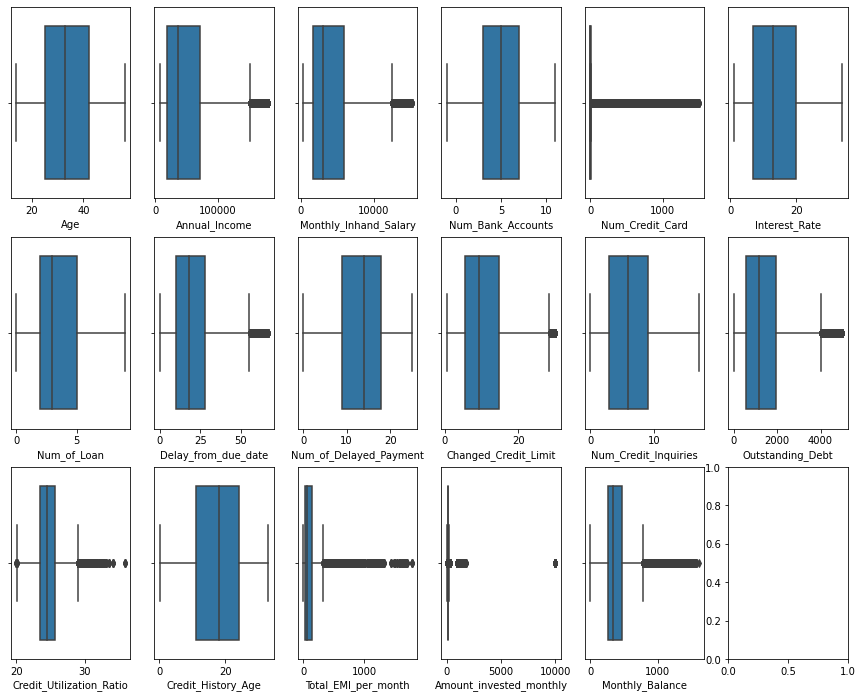

In [57]:
fig,ax=plt.subplots(3,6,figsize=(15,12))
for i,subplots in zip(dfnum.columns,ax.flatten()):
    sns.boxplot(dfnum[i],ax=subplots)

In [58]:
dfuc=dfcat[['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']]

In [59]:
dfuc=pd.get_dummies(dfuc,drop_first=True)
dfuc

,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0
99996,1,0,0,0,0,0,0,0
99997,1,0,0,0,0,0,0,0
99998,1,0,0,0,0,0,0,0


In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfsn=ss.fit_transform(dfnum)
dfsn=pd.DataFrame(dfsn,columns=dfnum.columns)

In [61]:
dff=pd.concat([dfsn,dfuc],axis=1)
dff

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.908465,-0.819625,-0.743748,-0.912592,-0.143150,-1.319266,0.190946,-1.220763,-1.503863,0.134322,...,-0.337497,-0.424827,1,0,0,1,0,0,0,0
1,-0.908465,-0.819625,-0.743748,-0.912592,-0.143150,-1.319266,0.190946,-1.355691,-1.503863,0.134322,...,-0.337497,-0.554806,1,0,0,1,0,0,0,0
2,-0.908465,-0.819625,-0.743748,-0.912592,-0.143150,-1.319266,0.190946,-1.220763,-1.503863,0.134322,...,-0.337497,-0.337525,1,0,0,1,0,0,0,0
3,-0.908465,-0.819625,-0.743748,-0.912592,-0.143150,-1.319266,0.190946,-1.085835,-1.503863,0.134322,...,-0.337497,-0.840177,1,0,0,1,0,0,0,0
4,-0.908465,-0.819625,-0.743748,-0.912592,-0.143150,-1.319266,0.190946,-1.018371,-1.503863,0.134322,...,-0.337497,-0.289575,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.815556,-0.283978,-0.261460,-0.527063,-0.127653,-0.861667,-0.626600,0.128516,-1.180610,0.169652,...,-0.329758,0.355901,1,0,0,0,0,0,0,0
99996,-0.815556,-0.283978,-0.261460,-0.527063,-0.127653,-0.861667,-0.626600,-0.208804,-1.180610,0.169652,...,-0.329758,0.434198,1,0,0,0,0,0,0,0
99997,-0.815556,-0.283978,-0.261460,-0.527063,-0.127653,-0.861667,-0.626600,0.398372,-1.180610,0.169652,...,-0.329758,0.528225,1,0,0,0,0,0,0,0
99998,-0.815556,-0.283978,-0.261460,-0.527063,-0.127653,-0.861667,-0.626600,-0.073876,-1.180610,0.169652,...,-0.329758,-0.393709,1,0,0,0,0,0,0,0


In [62]:
from sklearn.model_selection import train_test_split
y=y.astype(int)
xtrain,xtest,ytrain,ytest=train_test_split(dff,y,random_state=10,test_size=0.3,stratify=y)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(ytest,dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      8699
           1       0.76      0.76      0.76     15952
           2       0.70      0.68      0.69      5349

    accuracy                           0.74     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.74      0.74      0.74     30000



In [68]:
dfnumt=dftst.select_dtypes(include=np.number)
dfcatt=dftst.select_dtypes(exclude=np.number)
dfuct=dfcatt[['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']]
dfuct=pd.get_dummies(dfuct,drop_first=True)
dfuct
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfsnt=ss.fit_transform(dfnumt)
dfsnt=pd.DataFrame(dfsnt,columns=dfnumt.columns)
dfft=pd.concat([dfsnt,dfuct],axis=1)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(pd.read_csv('/content/drive/MyDrive/Project 4/Sample_Output.csv')['Predicted_values'],dt.predict(dfft)))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68     12335
           1       0.69      0.78      0.73     23431
           2       0.82      0.51      0.62     14234

    accuracy                           0.69     50000
   macro avg       0.71      0.68      0.68     50000
weighted avg       0.71      0.69      0.69     50000



In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      8699
           1       0.79      0.78      0.78     15952
           2       0.72      0.72      0.72      5349

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000



In [90]:
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],rf.predict(dfft)))

In [70]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(ytest,kn.predict(xtest)))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      8699
           1       0.81      0.78      0.80     15952
           2       0.73      0.72      0.73      5349

    accuracy                           0.78     30000
   macro avg       0.77      0.78      0.77     30000
weighted avg       0.79      0.78      0.78     30000



In [91]:
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],kn.predict(dfft)))

In [71]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(ytest,xgb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      8699
           1       0.80      0.79      0.80     15952
           2       0.72      0.74      0.73      5349

    accuracy                           0.78     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.78      0.78      0.78     30000



In [92]:
# print(classification_report(pd.read_csv('Sample_Output.csv')[ 'Predicted_values'],xgb.predict(dfft)))

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(ytest,gbc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      8699
           1       0.76      0.76      0.76     15952
           2       0.59      0.71      0.64      5349

    accuracy                           0.72     30000
   macro avg       0.70      0.71      0.70     30000
weighted avg       0.72      0.72      0.72     30000



In [93]:
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],gbc.predict(dfft)))

In [73]:
from sklearn.ensemble import StackingClassifier
s=StackingClassifier([('rf',RandomForestClassifier(n_estimators=5)),('gbc',GradientBoostingClassifier(n_estimators=15))])
s.fit(xtrain,ytrain)
print(classification_report(ytest,gbc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      8699
           1       0.76      0.76      0.76     15952
           2       0.59      0.71      0.64      5349

    accuracy                           0.72     30000
   macro avg       0.70      0.71      0.70     30000
weighted avg       0.72      0.72      0.72     30000



In [94]:
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],s.predict(dfft)))

In [74]:
from sklearn.ensemble import VotingClassifier
v=VotingClassifier(([('rf',RandomForestClassifier()),('xgb',XGBClassifier()),('gbc',GradientBoostingClassifier())]))
v.fit(xtrain,ytrain)
print(classification_report(ytest,gbc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      8699
           1       0.76      0.76      0.76     15952
           2       0.59      0.71      0.64      5349

    accuracy                           0.72     30000
   macro avg       0.70      0.71      0.70     30000
weighted avg       0.72      0.72      0.72     30000



In [95]:
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],v.predict(dfft)))

In [75]:
from sklearn.ensemble import BaggingClassifier
b=BaggingClassifier(GradientBoostingClassifier(),n_estimators=3)
b.fit(xtrain,ytrain)
print(classification_report(ytest,b.predict(xtest)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      8699
           1       0.76      0.76      0.76     15952
           2       0.58      0.70      0.64      5349

    accuracy                           0.72     30000
   macro avg       0.70      0.70      0.70     30000
weighted avg       0.72      0.72      0.72     30000



In [79]:
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],b.predict(dfft)))

In [78]:
from sklearn.ensemble import BaggingClassifier
b=BaggingClassifier(GradientBoostingClassifier(),n_estimators=9)
b.fit(xtrain,ytrain)
print(classification_report(ytest,b.predict(xtest)))
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],b.predict(dfft)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      8699
           1       0.76      0.76      0.76     15952
           2       0.59      0.71      0.64      5349

    accuracy                           0.72     30000
   macro avg       0.70      0.71      0.70     30000
weighted avg       0.72      0.72      0.72     30000



In [80]:
# so gradient boosting classifier is better with good results from all the models 
# now we need to work on hyper tuning it

In [77]:
s1=pd.DataFrame(dt.feature_importances_,index=xtrain.columns).sort_values(0,ascending=False).index[:10]
pd.DataFrame(dt.feature_importances_,index=xtrain.columns).sort_values(0,ascending=False)

,0
Monthly_Balance,0.240071
Outstanding_Debt,0.156272
Credit_Mix_Standard,0.114441
Delay_from_due_date,0.088183
Interest_Rate,0.051701
Changed_Credit_Limit,0.048624
Amount_invested_monthly,0.031064
Total_EMI_per_month,0.029373
Credit_Utilization_Ratio,0.028754
Num_Credit_Card,0.027904


In [82]:
s2=pd.DataFrame(rf.feature_importances_,index=xtrain.columns).sort_values(0,ascending=False).index[:10]
pd.DataFrame(rf.feature_importances_,index=xtrain.columns).sort_values(0,ascending=False)

,0
Monthly_Balance,0.199217
Outstanding_Debt,0.101370
Delay_from_due_date,0.086094
Interest_Rate,0.066683
Changed_Credit_Limit,0.050290
Credit_Mix_Good,0.050071
Credit_Mix_Standard,0.046055
Num_Credit_Card,0.035715
Num_Credit_Inquiries,0.035644
Total_EMI_per_month,0.033292


In [83]:
l1=list(s1)
for i in list(s2):
    l1.append(i)
bfl=bestfeatures=list(set(l1))
print('best features are',bestfeatures)
len(bfl)

best features are ['Total_EMI_per_month', 'Num_Credit_Card', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Delay_from_due_date', 'Credit_Mix_Good', 'Credit_Mix_Standard', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Num_Credit_Inquiries', 'Monthly_Balance', 'Interest_Rate']


12

In [84]:
rf.fit(xtrain[s1],ytrain)
print(classification_report(ytest,rf.predict(xtest[s1])))
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],rf.predict(dfft[s1])))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      8699
           1       0.79      0.78      0.79     15952
           2       0.73      0.72      0.72      5349

    accuracy                           0.77     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.77      0.77      0.77     30000



In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain[s1],ytrain)
print(classification_report(ytest,gbc.predict(xtest[s1])))
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],gbc.predict(dfft[s1])))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      8699
           1       0.75      0.76      0.75     15952
           2       0.58      0.65      0.62      5349

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.71      0.71      0.71     30000



In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain[s2],ytrain)
print(classification_report(ytest,gbc.predict(xtest[s2])))
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],gbc.predict(dfft[s2])))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      8699
           1       0.75      0.76      0.76     15952
           2       0.58      0.66      0.62      5349

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.71      0.71      0.71     30000



In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(xtrain[bfl],ytrain)
print(classification_report(ytest,gbc.predict(xtest[bfl])))
# print(classification_report(pd.read_csv('Sample_Output.csv')['Predicted_values'],gbc.predict(dfft[bfl])))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      8699
           1       0.75      0.76      0.76     15952
           2       0.58      0.66      0.62      5349

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.72      0.71      0.71     30000



In [88]:
# GRADIENT BOOSTING claSSIFIER IS THE A GOOD MODEL FOR THIS DATA AND THE BEST features are listed below
bfl

['Total_EMI_per_month',
 'Num_Credit_Card',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Delay_from_due_date',
 'Credit_Mix_Good',
 'Credit_Mix_Standard',
 'Changed_Credit_Limit',
 'Amount_invested_monthly',
 'Num_Credit_Inquiries',
 'Monthly_Balance',
 'Interest_Rate']

In [89]:
from sklearn.model_selection import GridSearchCV
p={'learning_rate':[0.1,0.05],'min_samples_split':[2,4],'max_depth':[4,6]}
gd=GridSearchCV(cv=5,estimator=GradientBoostingClassifier(),param_grid=p)
gd.fit(xtrain[bfl],ytrain)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [4, 6],
                         'min_samples_split': [2, 4]})

In [97]:
print(classification_report(ytest,gd.predict(xtest[bfl])))
print(classification_report(pd.read_csv('/content/drive/MyDrive/Project 4/Sample_Output.csv')['Predicted_values'],gd.predict(dfft[bfl])))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      8699
           1       0.79      0.77      0.78     15952
           2       0.65      0.69      0.67      5349

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     12335
           1       0.83      0.92      0.87     23431
           2       0.97      0.66      0.79     14234

    accuracy                           0.85     50000
   macro avg       0.87      0.84      0.84     50000
weighted avg       0.86      0.85      0.85     50000



In [98]:
gd.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 4}

In [99]:
gd.best_score_

0.7441000000000001

In [100]:
from sklearn.model_selection import GridSearchCV
p={'min_samples_split':[2,4],'max_depth':[4,6,8],}
gd=GridSearchCV(cv=5,estimator=RandomForestClassifier(),param_grid=p)
gd.fit(xtrain[bfl],ytrain)
print(classification_report(ytest,gd.predict(xtest[bfl])))
print(classification_report(pd.read_csv('/content/drive/MyDrive/Project 4/Sample_Output.csv')['Predicted_values'],gd.predict(dfft[bfl])))

              precision    recall  f1-score   support

           0       0.73      0.66      0.70      8699
           1       0.78      0.72      0.75     15952
           2       0.55      0.76      0.63      5349

    accuracy                           0.71     30000
   macro avg       0.69      0.71      0.70     30000
weighted avg       0.73      0.71      0.72     30000

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12335
           1       0.93      0.97      0.95     23431
           2       0.99      0.86      0.92     14234

    accuracy                           0.94     50000
   macro avg       0.94      0.93      0.93     50000
weighted avg       0.94      0.94      0.94     50000



In [101]:
gd.best_params_

{'max_depth': 8, 'min_samples_split': 2}

In [102]:
gd.best_score_

0.7125285714285714